[View in Colaboratory](https://colab.research.google.com/github/sametdumankaya/TensorflowDeepLearning/blob/master/mnist.ipynb)

In [0]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [0]:
# Reshape data

num_pixels = train_images.shape[1] * train_images.shape[2]

train_images = train_images.reshape(train_images.shape[0], num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [0]:
# Normalize data

train_images /= 255
test_images /=  255

In [0]:
# One-hot encode targets

train_labels  = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [0]:
# Create model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(num_pixels,)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
# Training

history = model.fit(train_images,
                    train_labels,
                    epochs=8,
                    validation_data=(test_images, test_labels),
                    shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 13s 212us/step - loss: 0.1994 - acc: 0.9404 - val_loss: 0.0934 - val_acc: 0.9714
Epoch 2/8
60000/60000 [==============================] - 12s 196us/step - loss: 0.0811 - acc: 0.9755 - val_loss: 0.0796 - val_acc: 0.9748
Epoch 3/8
 5920/60000 [=>............................] - ETA: 10s - loss: 0.0519 - acc: 0.9826

60000/60000 [==============================] - 12s 200us/step - loss: 0.0517 - acc: 0.9838 - val_loss: 0.0722 - val_acc: 0.9774
Epoch 4/8
60000/60000 [==============================] - 12s 198us/step - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0674 - val_acc: 0.9792
Epoch 5/8
27584/60000 [============>.................] - ETA: 6s - loss: 0.0266 - acc: 0.9914

60000/60000 [==============================] - 12s 198us/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0860 - val_acc: 0.9742
Epoch 6/8
60000/60000 [==============================] - 12s 198us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0712 - val_acc: 0.9804
Epoch 7/8
32608/60000 [===============>..............] - ETA: 5s - loss: 0.0133 - acc: 0.9957

60000/60000 [==============================] - 12s 197us/step - loss: 0.0161 - acc: 0.9948 - val_loss: 0.0827 - val_acc: 0.9785
Epoch 8/8
60000/60000 [==============================] - 12s 199us/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0726 - val_acc: 0.9802


In [12]:
# Print test results

scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 61us/step
Test loss: 0.07262713999807492
Test accuracy: 0.9802


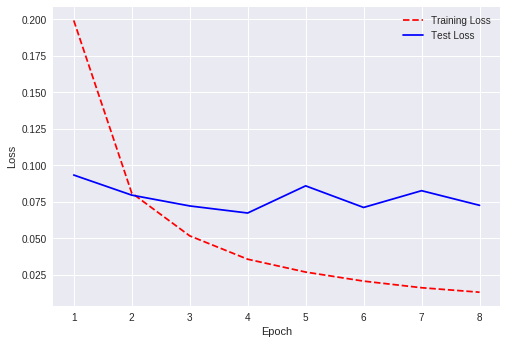

In [13]:
# Visualize loss history

training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();